In [1]:
import seaborn as sea
import pandas as pd
import matplotlib.pyplot as mt

In [2]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\vgchartz-2024.csv')
df.head(2)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03


In [3]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [4]:
df.drop(['img','last_update'],axis=1,inplace=True)

In [5]:
df.head(2)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18


In [6]:
df.rename(columns={'title':"Game","console":"Devices",
                   "genre":"Genres","publisher":"Distributor",
                   "developer":"Creators","critic_score":"Rating",
                   "total_sales":"Total Sales","na_sales":"North America Sales",
                  "jp_sales":"Japan Sales",'pal_sales':"Phase Alternate Line",
                   "other_sales":"other_sales".title(),'release_date':"launch_date".title()},inplace=True)

In [7]:
df.head(2)

,Game,Devices,Genres,Distributor,Creators,Rating,Total Sales,North America Sales,Japan Sales,Phase Alternate Line,Other_Sales,Launch_Date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18


In [8]:
df.isnull().sum()

Game                        0
Devices                     0
Genres                      0
Distributor                 0
Creators                   17
Rating                  57338
Total Sales             45094
North America Sales     51379
Japan Sales             57290
Phase Alternate Line    51192
Other_Sales             48888
Launch_Date              7051
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Game                    0
Devices                 0
Genres                  0
Distributor             0
Creators                0
Rating                  0
Total Sales             0
North America Sales     0
Japan Sales             0
Phase Alternate Line    0
Other_Sales             0
Launch_Date             0
dtype: int64

In [11]:
df.head(2)

,Game,Devices,Genres,Distributor,Creators,Rating,Total Sales,North America Sales,Japan Sales,Phase Alternate Line,Other_Sales,Launch_Date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18


In [12]:
df.dtypes

Game                     object
Devices                  object
Genres                   object
Distributor              object
Creators                 object
Rating                  float64
Total Sales             float64
North America Sales     float64
Japan Sales             float64
Phase Alternate Line    float64
Other_Sales             float64
Launch_Date              object
dtype: object

In [13]:
df['Launch_Date']=df['Launch_Date'].astype('string')

In [14]:
df.dtypes

Game                            object
Devices                         object
Genres                          object
Distributor                     object
Creators                        object
Rating                         float64
Total Sales                    float64
North America Sales            float64
Japan Sales                    float64
Phase Alternate Line           float64
Other_Sales                    float64
Launch_Date             string[python]
dtype: object

In [15]:
df['Launch_Date']=pd.to_datetime(df['Launch_Date'])

In [16]:
df.dtypes

Game                            object
Devices                         object
Genres                          object
Distributor                     object
Creators                        object
Rating                         float64
Total Sales                    float64
North America Sales            float64
Japan Sales                    float64
Phase Alternate Line           float64
Other_Sales                    float64
Launch_Date             datetime64[ns]
dtype: object

In [17]:
df['Year']=df['Launch_Date'].dt.year

In [18]:
df['TS_%']=(df['Total Sales']/df['Total Sales'].sum())*100
df['NAS_%']=(df['North America Sales']/df['North America Sales'].sum())*100
df['JP_%']=(df['Japan Sales']/df['Japan Sales'].sum())*100
df['PAL_%']=(df['Phase Alternate Line']/df['Phase Alternate Line'].sum())*100
df['OS_%']=(df['Other_Sales']/df['Other_Sales'].sum())*100

In [19]:
df[['TS_%','NAS_%','JP_%','PAL_%','OS_%']].head(3)

,TS_%,NAS_%,JP_%,PAL_%,OS_%
0,1.119726,0.762482,0.768156,1.551377,1.447997
1,1.068479,0.725375,0.465549,1.529327,1.401587
2,0.889940,1.006667,0.364680,0.864676,0.826101


In [20]:
df=df.round({'TS_%':2,'NAS_%':2,'JP_%':2,'PAL_%':2,'OS_%':2})

In [21]:
df[["TS_%",'NAS_%','JP_%','PAL_%','OS_%']]

,TS_%,NAS_%,JP_%,PAL_%,OS_%
0,1.12,0.76,0.77,1.55,1.45
1,1.07,0.73,0.47,1.53,1.40
2,0.89,1.01,0.36,0.86,0.83
4,0.83,0.74,0.32,0.95,1.13
5,0.82,1.09,0.10,0.68,0.62
...,...,...,...,...,...
13056,0.00,0.00,0.02,0.00,0.00
13198,0.00,0.00,0.02,0.00,0.00
13466,0.00,0.00,0.02,0.00,0.00
14151,0.00,0.00,0.01,0.00,0.00


In [22]:
df.head(2)

,Game,Devices,Genres,Distributor,Creators,Rating,Total Sales,North America Sales,Japan Sales,Phase Alternate Line,Other_Sales,Launch_Date,Year,TS_%,NAS_%,JP_%,PAL_%,OS_%
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013,1.12,0.76,0.77,1.55,1.45
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014,1.07,0.73,0.47,1.53,1.40


### What are market share of distributer as per the sales ???

In [115]:
dist_sales=df.groupby('Distributor')['Total Sales'].sum().sort_values(ascending=False)
dist_sales.head(5)

Distributor
Activision         272.39
Electronic Arts    240.05
Rockstar Games     167.32
Ubisoft            121.05
EA Sports          114.02
Name: Total Sales, dtype: float64

### How many games released by the publisher ???

In [81]:
dist_count=df['Distributor'].value_counts().sort_values(ascending=False).head(10)
dist=pd.DataFrame(dist_count)
dist

,count
Distributor,
Electronic Arts,115
Nintendo,97
Ubisoft,70
Sony Computer Entertainment,66
Konami,64
Activision,60
Capcom,60
Sega,56
Square Enix,48


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

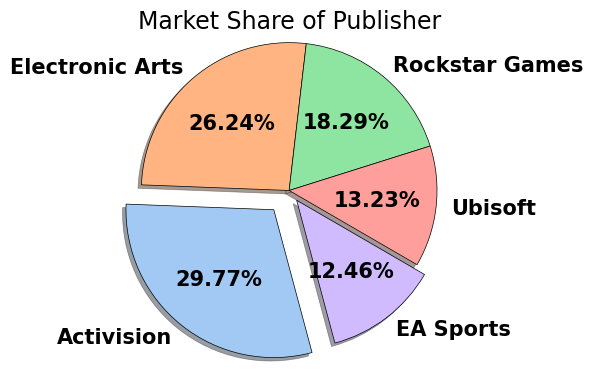

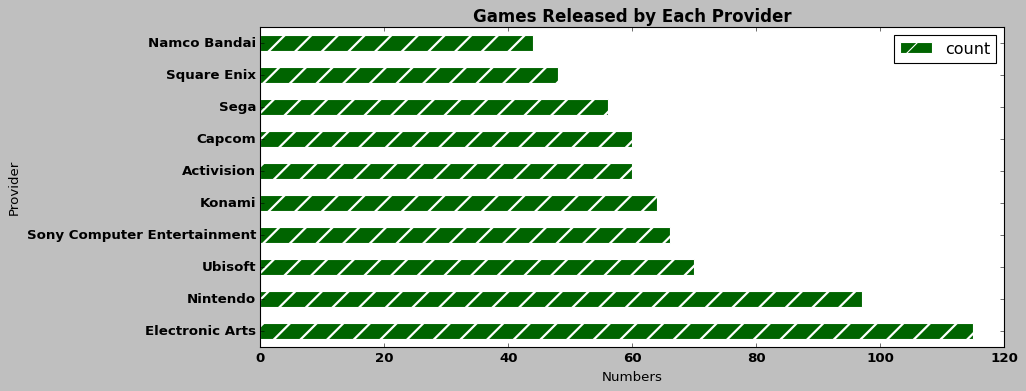

In [184]:

mt.subplot(1,3,1)
c_1=sea.color_palette('pastel')
mt.style.use('default')
dist_sales.head(5).plot(kind='pie',figsize=(15,4),autopct="%0.2f%%",
                        counterclock=False,startangle=285,shadow=True,
                        wedgeprops={'edgecolor':"black",'linewidth':0.5},
                        textprops={'fontweight':'heavy','size':15},
                        explode=[0.2,0,0,0,0.1],
                        radius=1.2,colors=c_1)
mt.title('Market Share of Publisher',fontweight='medium',size=17)
mt.ylabel('')

mt.style.use('classic')
dist.plot(kind='barh',figsize=(12,5),color='darkgreen',hatch='/',edgecolor='white',hatch_linewidth=2)
mt.title('Games Released by Each Provider',size=15,fontweight='bold')
mt.ylabel('Provider',fontweight='medium',size=12)
mt.xlabel('Numbers',fontweight='medium',size=12)

mt.yticks(fontweight='heavy',size=12)
mt.xticks(fontweight='heavy',size=12)


In [185]:
# dist.plot(kind='bar',y='Distributor')

In [26]:
df['Distributor'].value_counts()

Distributor
Electronic Arts                115
Nintendo                        97
Ubisoft                         70
Sony Computer Entertainment     66
Konami                          64
                              ... 
Microids                         1
Nippon Ichi Software             1
JoWood Productions               1
Maxis                            1
Arc System Works                 1
Name: count, Length: 84, dtype: int64

In [27]:
df.head(2)

,Game,Devices,Genres,Distributor,Creators,Rating,Total Sales,North America Sales,Japan Sales,Phase Alternate Line,Other_Sales,Launch_Date,Year,TS_%,NAS_%,JP_%,PAL_%,OS_%
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013,1.12,0.76,0.77,1.55,1.45
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014,1.07,0.73,0.47,1.53,1.40


### What is the game genre that generated the highest profit ???

In [28]:
gen_sale=df.groupby('Genres')['Total Sales'].sum().sort_values(ascending=False)
gen_sale

Genres
Shooter             460.97
Action              371.13
Sports              247.92
Role-Playing        182.95
Racing              151.93
Fighting             79.25
Platform             71.04
Action-Adventure     60.45
Misc                 56.31
Adventure            54.52
Simulation           41.03
Puzzle               14.62
Strategy             13.72
Music                 4.08
Party                 2.30
Sandbox               1.89
MMO                   0.32
Board Game            0.30
Name: Total Sales, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_8740\3127003543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  gen_sales=sea.barplot(data=df,y='Genres',x='Total Sales',


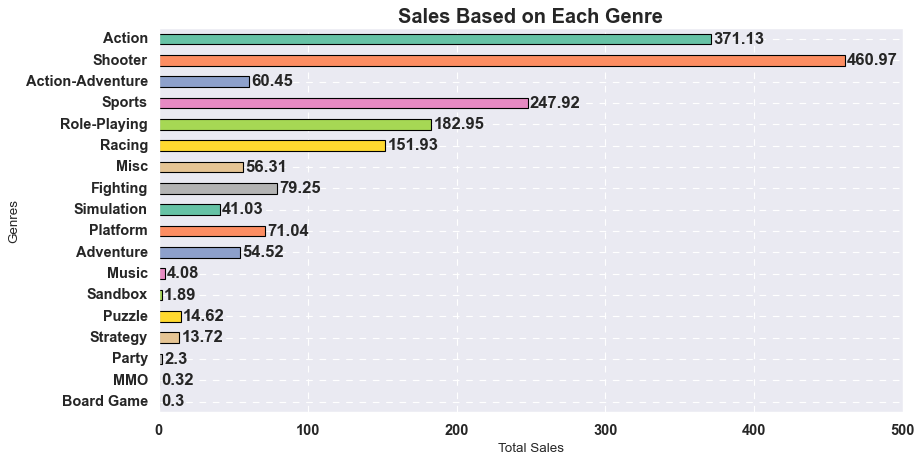

In [198]:
sea.set_style('darkgrid')
sea.set_context('notebook')

mt.figure(figsize=(12,6))

gen_sales=sea.barplot(data=df,y='Genres',x='Total Sales',
                      palette='Set2',
                      estimator=sum,
                      errorbar=('ci', 0),
                      width=0.5,
                      saturation=5,
                      edgecolor='black')

mt.title('Sales Based on Each Genre',fontweight='semibold',size=18)
mt.xticks(fontweight='heavy',size=13)
mt.yticks(fontweight='heavy',size=13)
mt.grid('lines',linestyle="--",linewidth=1,color='white')

for gen in gen_sales.containers:
    gen_sales.bar_label(gen,size=15,fontweight='heavy',padding=2)

## How many games were produced for that genre ??

In [30]:
df['Genres'].value_counts()

Genres
Action              201
Shooter             197
Role-Playing        189
Sports              113
Racing              105
Fighting             89
Platform             72
Adventure            59
Simulation           43
Misc                 40
Action-Adventure     32
Puzzle               30
Strategy             30
Party                 4
Music                 3
Sandbox               1
MMO                   1
Board Game            1
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_8740\1830596092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(data=df,x='Genres'


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200'),
  Text(0, 225.0, '225')])

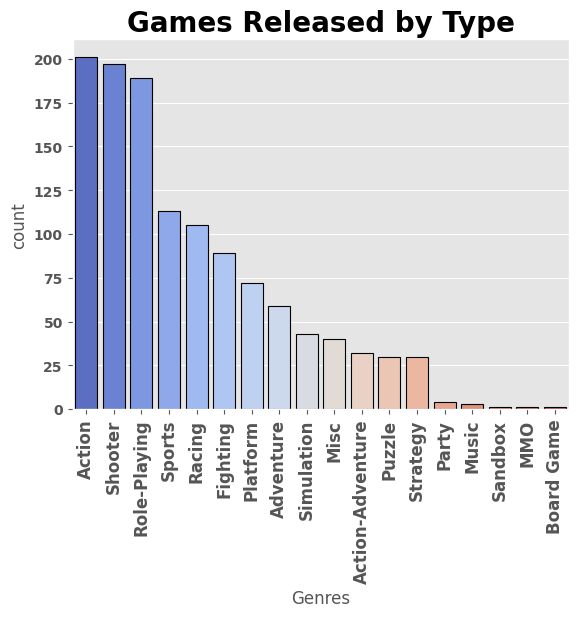

In [214]:
mt.style.use('ggplot')
sea.countplot(data=df,x='Genres'
              ,order=df['Genres'].value_counts().index,
              ec='black',lw=0.8,
              palette='coolwarm')

mt.title('Games Released by Type',fontweight='bold',size=20)
mt.xticks(rotation=90,fontweight='heavy',size=12)
mt.yticks(fontweight='heavy',size=10)


In [33]:
df.dtypes

Game                            object
Devices                         object
Genres                          object
Distributor                     object
Creators                        object
Rating                         float64
Total Sales                    float64
North America Sales            float64
Japan Sales                    float64
Phase Alternate Line           float64
Other_Sales                    float64
Launch_Date             datetime64[ns]
Year                             int32
TS_%                           float64
NAS_%                          float64
JP_%                           float64
PAL_%                          float64
OS_%                           float64
dtype: object

# How much regional sales as per the genres ???

In [34]:
comp_gen=df[["Genres",'North America Sales','Japan Sales','Phase Alternate Line','Other_Sales']]
comp_map=comp_gen.groupby(by=['Genres']).sum()

# How much regional sales as per the Platforms ???

In [35]:
con_sal=df[["Devices",'North America Sales','Japan Sales','Phase Alternate Line','Other_Sales']]
con=con_sal.groupby(by=['Devices']).sum()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0, 0.5, '3DS'),
  Text(0, 1.5, 'DC'),
  Text(0, 2.5, 'DS'),
  Text(0, 3.5, 'GB'),
  Text(0, 4.5, 'GBA'),
  Text(0, 5.5, 'GBC'),
  Text(0, 6.5, 'GC'),
  Text(0, 7.5, 'N64'),
  Text(0, 8.5, 'NES'),
  Text(0, 9.5, 'NS'),
  Text(0, 10.5, 'PS'),
  Text(0, 11.5, 'PS2'),
  Text(0, 12.5, 'PS3'),
  Text(0, 13.5, 'PS4'),
  Text(0, 14.5, 'PSN'),
  Text(0, 15.5, 'PSP'),
  Text(0, 16.5, 'PSV'),
  Text(0, 17.5, 'SAT'),
  Text(0, 18.5, 'Wii'),
  Text(0, 19.5, 'WiiU'),
  Text(0, 20.5, 'X360'),
  Text(0, 21.5, 'XB'),
  Text(0, 22.5, 'XOne')])

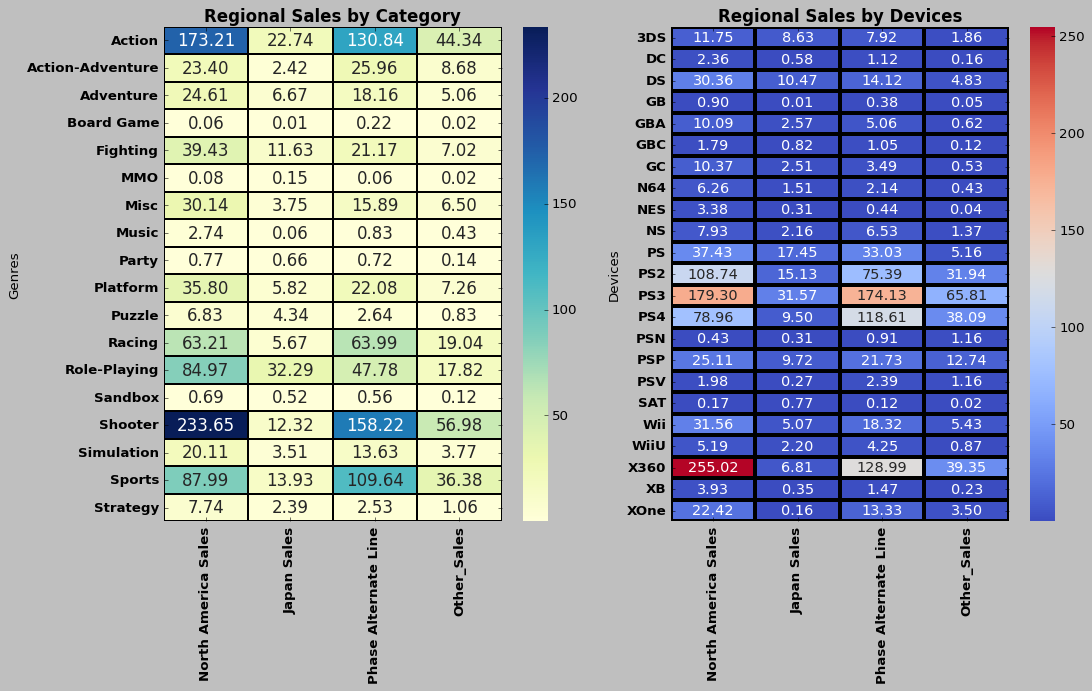

In [417]:
mt.figure(figsize=(15,17))

mt.subplot(2,2,1)
sea.heatmap(comp_map,cmap='YlGnBu',
            annot=True,fmt='0.2f',
            linewidths=1.8,linecolor='black',
           annot_kws={'fontsize':15})

mt.title('Regional Sales by Category',fontweight='bold',size=15)
mt.xticks(fontweight='heavy',size=12)
mt.yticks(fontweight='heavy',size=12)


mt.subplot(2,2,2)
sea.heatmap(con,cmap='coolwarm',
            annot=True,fmt='0.2f',
            linecolor='black',linewidths=2,
           annot_kws={'fontsize':13})

mt.title('Regional Sales by Devices',fontweight='bold',size=15)
mt.xticks(fontweight='heavy',size=12)
mt.yticks(fontweight='heavy',size=12)

In [37]:
# df.pivot_table(index='Genres',columns=['North America Sales','Japan Sales','Phase Alternate Line','Other_Sales'])

In [38]:
# sea.heatmap()

In [39]:
df.head(2)

,Game,Devices,Genres,Distributor,Creators,Rating,Total Sales,North America Sales,Japan Sales,Phase Alternate Line,Other_Sales,Launch_Date,Year,TS_%,NAS_%,JP_%,PAL_%,OS_%
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013,1.12,0.76,0.77,1.55,1.45
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014,1.07,0.73,0.47,1.53,1.40


# How much platforms (Devices) earns ??

In [40]:
dev_sale=df.groupby('Devices')['Total Sales'].sum().sort_values(ascending=False)
dev_sale

Devices
PS3     450.68
X360    430.26
PS4     245.19
PS2     231.15
PS       93.04
PSP      69.34
Wii      60.42
DS       59.75
XOne     39.39
3DS      30.20
GBA      18.37
NS       17.96
GC       16.92
WiiU     12.55
N64      10.32
XB        5.98
PSV       5.81
DC        4.23
NES       4.17
GBC       3.78
PSN       2.82
GB        1.33
SAT       1.07
Name: Total Sales, dtype: float64

# How many devices contribute in the market ???

In [41]:
dev_count=df['Devices'].value_counts()
dev_count

Devices
X360    261
PS3     258
PS2      95
PSP      88
DS       80
Wii      76
3DS      69
PS4      67
PS       63
NS       36
GC       27
WiiU     24
GBA      21
XOne     13
N64      13
XB        6
PSV       5
DC        2
GBC       2
PSN       1
NES       1
GB        1
SAT       1
Name: count, dtype: int64

Text(0, 0.5, '')

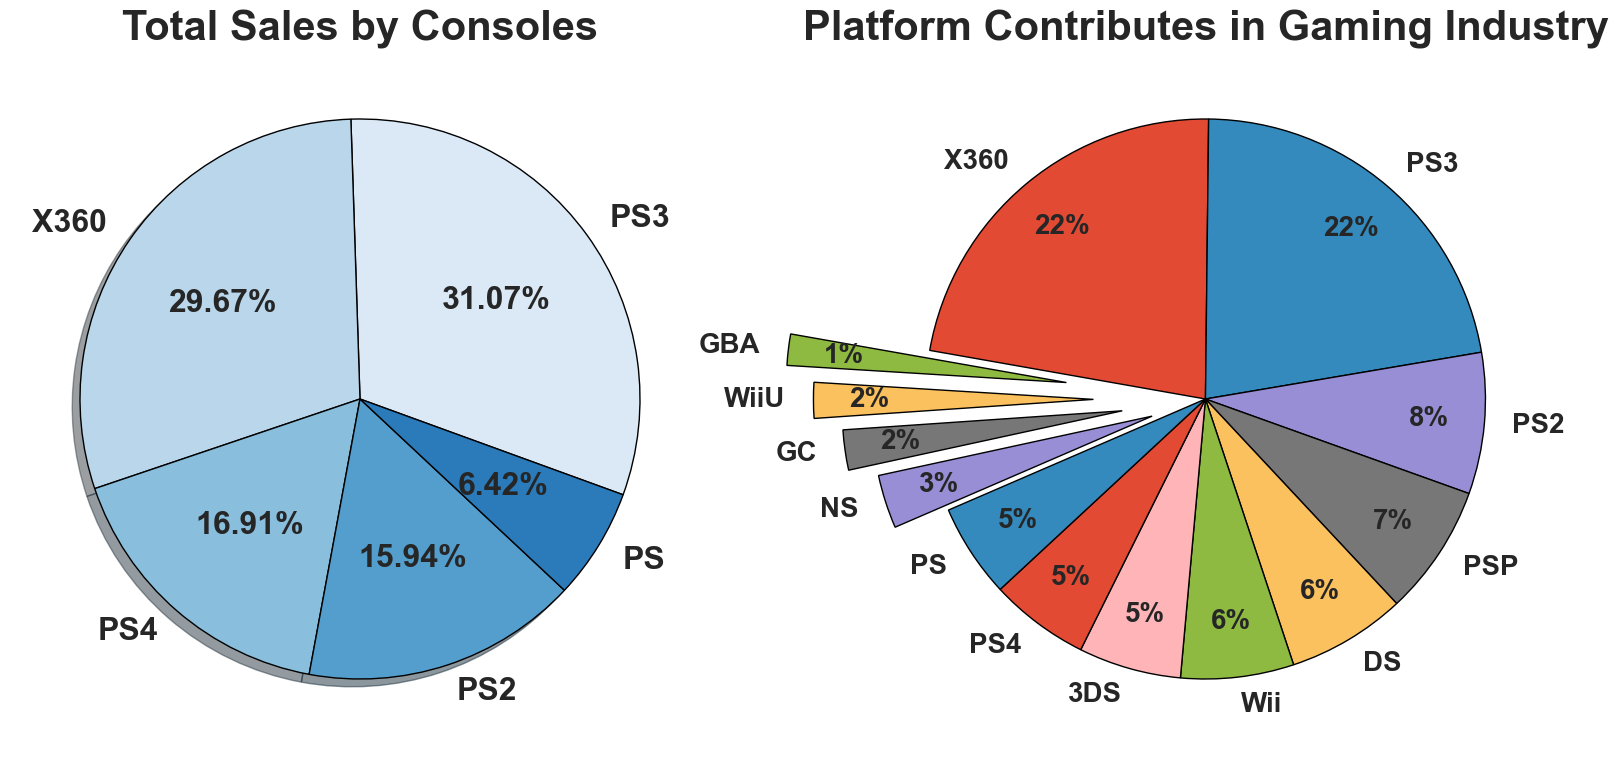

In [343]:
mt.figure(figsize=(20,20))

mt.subplot(2,2,1)
col_1=sea.color_palette('Blues')
dev_sale.head(5).plot(kind='pie',startangle=-20,
                      shadow=True,autopct='%0.2f%%',
                      wedgeprops={'edgecolor':'black'},
                     textprops={'fontweight':'heavy','size':23},
                     colors=col_1)

mt.title('Total Sales by Consoles',fontweight='bold',size=30)
mt.ylabel('')

mt.subplot(2,2,2)
dev_count[:-10].plot(kind='pie',counterclock=False,
                     startangle=170,autopct="%0.d%%",
                     pctdistance=0.8,
                    explode=[0,0,0,0,0,0,0,0,0,0.2,0.3,0.4,0.5],
                     wedgeprops={'edgecolor':'black'},
                     textprops={'fontweight':'heavy','size':20})

mt.title('Platform Contributes in Gaming Industry',fontweight='bold',size=30)
mt.ylabel('')

### Times Series Analysis 

### What is the sales no over time ??

In [348]:
df.groupby('Year')['Total Sales'].sum().sort_index(ascending=True)

Year
1989      4.17
1995      1.07
1996     13.65
1997     17.82
1998     14.74
1999     29.01
2000     37.76
2001     47.62
2002     62.16
2003     48.41
2004     34.74
2005     65.08
2006     62.81
2007    128.68
2008    150.46
2009    173.12
2010    201.97
2011    220.94
2012     73.54
2013     91.22
2014     92.83
2015     77.49
2016     66.84
2017     55.62
2018     42.98
Name: Total Sales, dtype: float64

(2002.0, 2019.0)

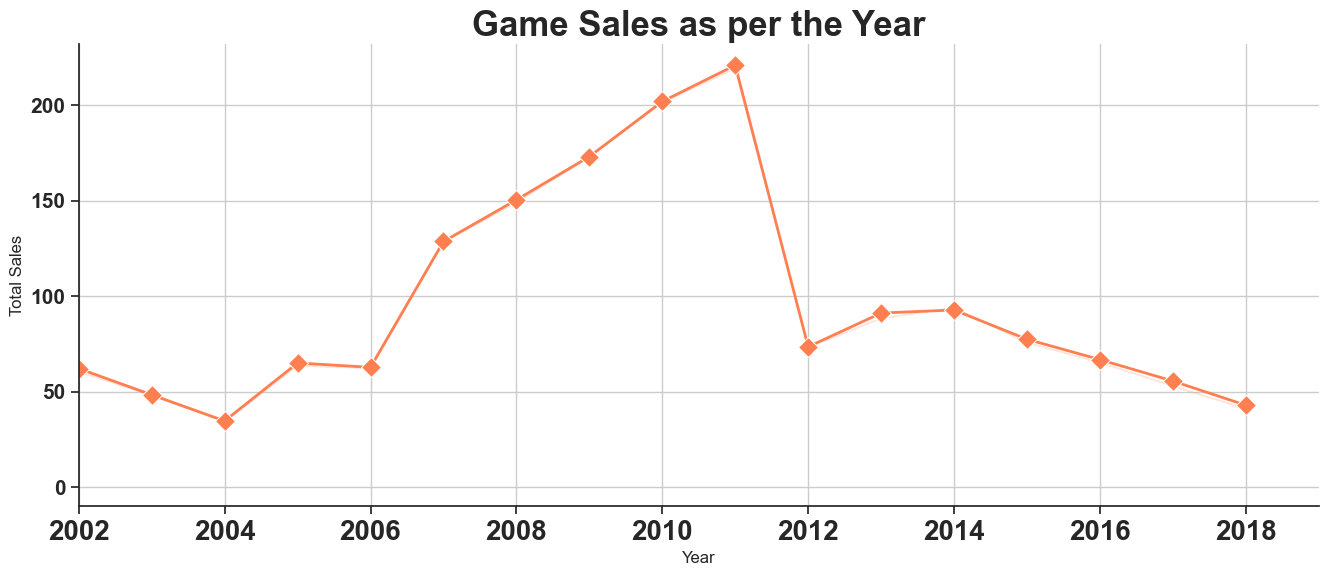

In [347]:
# mt.style.use('ggplot')
sea.set_style('ticks')
mt.figure(figsize=(16,6))
sea.lineplot(data=df,x='Year',y='Total Sales',
             estimator=sum,errorbar=('ci', 0),
             linewidth=2,
             marker="D",color='coral',mec='white',markersize=10)
mt.title('Game Sales as per the Year',size=25,fontweight='bold')
mt.grid(True)
mt.xticks(fontweight='bold',size=20)
mt.yticks(fontweight='bold',size=15)
sea.despine()

# mt.xlim(2001,2019)
mt.xlim(2002,2019)

In [45]:
df.reset_index(False,inplace=True)


#### How many games released in each time ???

In [306]:
df['Year'].value_counts().sort_index(ascending=True)

Year
1989      1
1995      1
1996      8
1997     17
1998     15
1999     19
2000     22
2001     23
2002     28
2003     29
2004     19
2005     48
2006     58
2007     96
2008    123
2009    140
2010    152
2011    150
2012     41
2013     42
2014     35
2015     31
2016     28
2017     42
2018     42
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_8740\4044661099.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  game_rel=sea.countplot(data=df,x='Year'


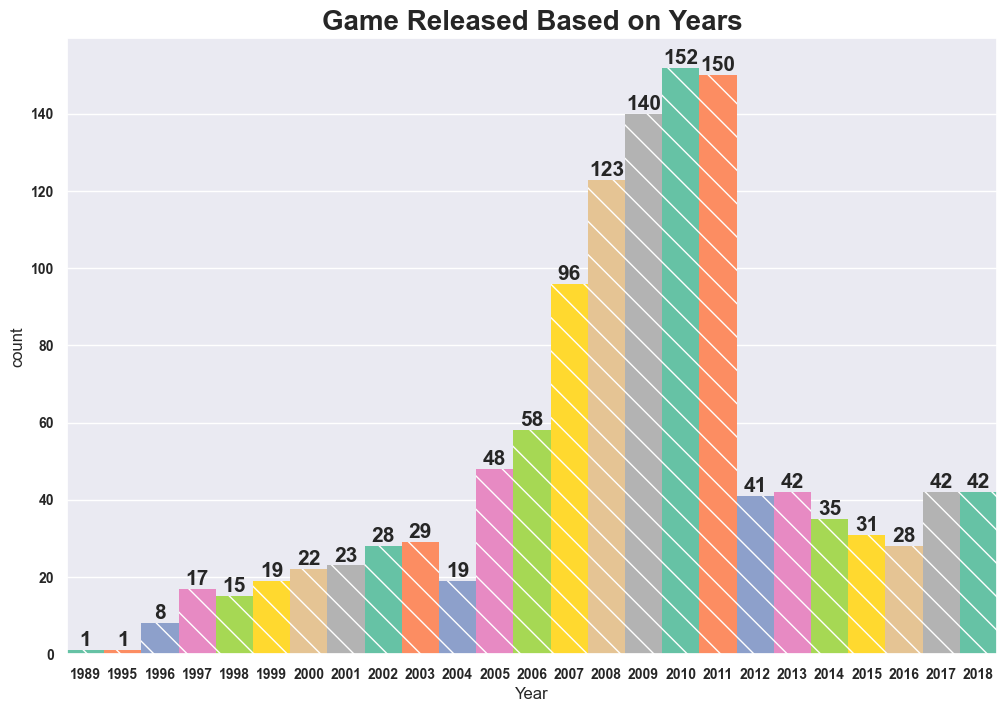

In [355]:
sea.set_style('darkgrid')
sea.set_context('notebook')

mt.figure(figsize=(12,8))
game_rel=sea.countplot(data=df,x='Year'
                       ,palette='Set2',edgecolor='white',
                       width=1,linewidth=0,hatch='\\',saturation=3)



mt.title('Game Released Based on Years',size=20,fontweight='bold')
mt.xticks(size=10,fontweight='bold')
mt.yticks(size=10,fontweight='heavy')


for game in game_rel.containers:
    game_rel.bar_label(game,size=15,fontweight='bold')

In [48]:
df.columns

Index(['index', 'Game', 'Devices', 'Genres', 'Distributor', 'Creators',
       'Rating', 'Total Sales', 'North America Sales', 'Japan Sales',
       'Phase Alternate Line', 'Other_Sales', 'Launch_Date', 'Year', 'TS_%',
       'NAS_%', 'JP_%', 'PAL_%', 'OS_%'],
      dtype='object')

In [49]:
rev_reg=df[['North America Sales',
            'Japan Sales',
            'Phase Alternate Line',
            'Other_Sales']].sum().reset_index()

In [50]:
rev_reg

,index,0
0,North America Sales,835.43
1,Japan Sales,128.88
2,Phase Alternate Line,634.92
3,Other_Sales,215.47


In [51]:
rev_reg=df[['North America Sales',
            'Japan Sales','Phase Alternate Line',
            'Other_Sales']].sum().reset_index()

In [52]:
rev_reg

,index,0
0,North America Sales,835.43
1,Japan Sales,128.88
2,Phase Alternate Line,634.92
3,Other_Sales,215.47


In [53]:
sale_reg=df[['North America Sales',
            'Japan Sales','Phase Alternate Line',
            'Other_Sales']].sum().sort_values(ascending=False)

In [54]:
sale_reg

North America Sales     835.43
Phase Alternate Line    634.92
Other_Sales             215.47
Japan Sales             128.88
dtype: float64

Text(0.5, 1.0, 'Sum of NA_Sales, JP_Sales, EU_Sales, Other_Sales')

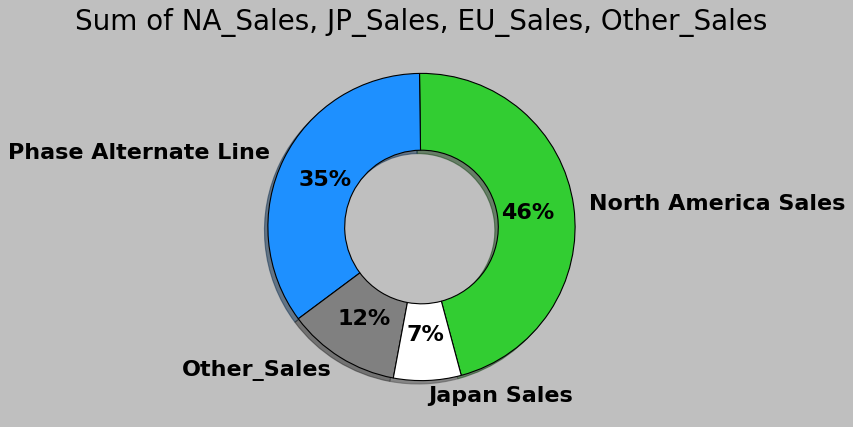

In [384]:
mt.style.use('classic')

sale_reg.plot(kind='pie',startangle=-75,
              autopct='%0.f%%',shadow=True,
             wedgeprops={'width':0.5},pctdistance=0.7,
             textprops={'fontweight':'heavy','size':20},
             colors=['limegreen','dodgerblue','grey','white'])
mt.title('Sum of NA_Sales, JP_Sales, EU_Sales, Other_Sales',fontweight='medium',size=25)


## Which games have  lowest rating ??

In [412]:
low_rate_game=df.groupby('Game')['Rating'].min().sort_values(ascending=True).head(1)
low_rate_game


Game
Farming Simulator 2013    3.0
Name: Rating, dtype: float64

In [413]:
print(f"Low Rating  {low_rate_game}.")

Low Rating  Game
Farming Simulator 2013    3.0
Name: Rating, dtype: float64.


## Which games have highest rating ??

In [414]:
pop_game=df.groupby('Game')['Rating'].max().sort_values(ascending=False).head(1)
pop_game

Game
Grand Theft Auto IV    10.0
Name: Rating, dtype: float64

In [415]:
print(f"The Most Popular {pop_game}.")

The Most Popular Game
Grand Theft Auto IV    10.0
Name: Rating, dtype: float64.


In [56]:
# label=rev_reg("region")
# sizes=rev_reg('sale')

In [57]:
# rev_reg.plot(kind='pie')

In [59]:
# df.loc[(df['Rating']>=9.4),['Game','Genres','Rating']].head(3)

In [304]:
# df.loc[(df['Rating'].between(9.5,10)),['Game','Rating']].sort_values(by='Rating',
#                                                                      ascending=False)

In [305]:
# df.columns

In [ ]:
# Stacked bar chart !!! 

In [62]:
# mt.style.use('default')
# mt.figure(figsize=(20,10))
# mt.bar(df['Devices'],df['North America Sales'],color='red')
# mt.bar(df['Devices'],df['Japan Sales'],color='blue')
# mt.bar(df['Devices'],df['Phase Alternate Line'],color='black')
# mt.bar(df['Devices'],df['Other_Sales'],color='orange')

In [63]:
# df.plot(kind='bar',x='Devices',
#         y=['North America Sales','Japan Sales','Phase Alternate Line','Other_Sales'])

In [64]:
# df.plot(kind='bar',x'Devices',
#         y=['North America Sales','Japan Sales','Phase Alternate Line','Other_Sales'],stacked=True)

In [65]:
# r=df['Total Sales'].astype(int)

In [66]:
# r.sum()

In [67]:
# df.columns

In [68]:
# r.plot(kind='bar',y=['North America Sales','Japan Sales','Phase Alternate Line','Other_Sales']

In [69]:
# country=['North America Sales','Japan Sales','Phase Alternate Line','Other_Sales']

In [70]:
# sea.barplot(data=df,x='Genres',y='Total Sales',hue='Devices')

In [71]:
# mt.style.use('ggplot')
# mt.figure(figsize=(16,6))
# sea.lineplot(data=df,x='Year',y='Total Sales',hue='Genres',hue_order=df['Genres'].value_counts().index[0:3],
#              estimator=sum,errorbar=('ci', 0),linewidth=2,markersize=10)

# # mt.xlim(2001,2019)
# mt.xlim(2001,2019)

In [72]:
# df[['Total Sales']].plot(kind='line')

In [73]:
# df.groupby('Year')['Total Sales'].sum().plot(kind='area')

In [74]:
# gen=df[["Total Sales",'North America Sales','Japan Sales','Phase Alternate Line','Other_Sales']]
# mmap=gen.groupby(by=['Total Sales']).sum().plo

In [75]:
# sea.set_style('darkgrid')
# sea.set_context('notebook')

# mt.figure(figsize=(12,6))

# gen_sales=sea.barplot(data=df,y='Genres',x='Total Sales',
#                       palette='Set2',
#                       estimator=sum,
#                       errorbar=('ci', 0),
#                       width=0.5,
#                       saturation=5,
#                       edgecolor='black')

# mt.grid('lines',linestyle="--",linewidth=1,color='white')
# mt.yticks(fontweight='heavy',size=12)


# for gen in gen_sales.containers:
#     gen_sales.bar_label(gen,fmt="%0.2d%%",size=15,fontweight='heavy',padding=2)

In [76]:
# e=df[['Devices','North America Sales','Japan Sales']].head(10)

In [77]:
# df.loc[df.groupby('Game'),(df["Rating"].between(9.5,10)),['Game','Rating']]


In [78]:
# dec=pd.crosstab(index=df['Devices'],columns=df[['North America Sales','Japan Sales']])
# dec